In [2]:
%pip install -U datasets
%pip install openai scikit-learn pandas matplotlib seaborn tqdm

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [36]:
from datasets import load_dataset

ds = load_dataset("nnudee/Thai-Thangkarn-sentence", split = 'train')
ds = ds.class_encode_column("label")
ds = ds.train_test_split(test_size=0.2, stratify_by_column="label", seed = 1122)

In [35]:
ds[0]

{'label': 'พิธีการ',
 'contact': 'Email',
 'category': 'academic advice',
 'type': 'project consultation',
 'output': 'ข้าพระพุทธเจ้าเกล้ากระหม่อมขอน้อมรับพระบรมราโชบายด้วยความเคารพอย่างสูง ข้าพระพุทธเจ้าเกล้ากระหม่อมมีความประสงค์จะขอพระราชทานคำปรึกษาเกี่ยวกับโครงการศึกษาวิจัยที่กำลังดำเนินการอยู่ในขณะนี้ เพื่อให้สามารถปฏิบัติตามพระบรมราโชบายได้อย่างถูกต้องและเหมาะสม ข้าพระพุทธเจ้าเกล้ากระหม่อมขอพระราชทานพระกรุณาโปรดพิจารณาให้คำแนะนำในเรื่องดังกล่าวด้วยจักเป็นพระกรุณาอย่างหาที่สุดมิได้',
 'reasoning': 'This text is highly ceremonial and formal, using phrases like "ข้าพระพุทธเจ้าเกล้ากระหม่อมขอน้อมรับพระบรมราโชบาย" and "จักเป็นพระกรุณาอย่างหาที่สุดมิได้". It reflects "ภาษาระดับพิธีการ", with complex, respectful sentence structures typical of royal or official contexts. The use of "เกล้ากระหม่อม" as a pronoun further emphasizes the formal and reverent tone, making it suitable for an email requesting academic advice in a highly formal setting.',
 'model': 'typhoon-v2-70b-instruct'}

In [30]:
ds_pd = ds['test'].to_pandas()
ds_pd.reset_index(inplace = True)
ds_pd

,index,label,contact,category,type,output,reasoning,model
0,0,1,Chat,attendance issues,urgent matter,อาจารย์คะ ขอแจ้งว่าหนูมีเหตุฉุกเฉินที่บ้าน ต้อ...,ข้อความนี้ใช้ภาษาสุภาพแต่เป็นประโยคที่อ่านง่าย...,gpt-4.1-2025-04-14
1,1,1,Chat,submission notifications,technical problem,อาจารย์คะ ผมมีปัญหากับไฟล์ที่ส่งไปครับ มันเกิด...,"This text is semi-formal, using polite and app...",typhoon-v2-70b-instruct
2,2,4,Email,attendance issues,late arrival,สวัสดีค่ะ อาจารย์ วันนี้ตัวเองอาจจะเข้าชั้นเรี...,"This text is informal but polite, using everyd...",typhoon-v2-70b-instruct
3,3,1,Chat,attendance issues,request leave,สวัสดีค่ะ อาจารย์ วันนี้ผู้จัดทำอาจจะมาไม่ทันเ...,"This text is semi-formal, using polite and app...",typhoon-v2-70b-instruct
4,4,3,Email,attendance issues,absence notification,ข้าพระพุทธเจ้าใคร่ขอกราบเรียนอาจารย์ด้วยความเค...,"This text is highly ceremonial and formal, usi...",typhoon-v2-70b-instruct
...,...,...,...,...,...,...,...,...
8436,8436,1,Email,attendance issues,absence notification,เรียนอาจารย์ ฉันขอแจ้งลาการเข้าเรียนในวันพรุ...,"This text is semi-formal, using polite and app...",typhoon-v2-70b-instruct
8437,8437,4,Chat,document requests,official letter,ครูคะ หนูขอแบบฟอร์มหน่อยได้ไหมคะ ขอบคุณค่ะ,"This text is informal but polite, using everyd...",typhoon-v2-70b-instruct
8438,8438,3,Email,document requests,recommendation letter,ข้าพระพุทธเจ้าใคร่ขอกราบเรียนศาสตราจารย์ด้วยคว...,"This text is highly ceremonial and formal, usi...",typhoon-v2-70b-instruct
8439,8439,4,Email,submission notifications,delay in assignment,สวัสดีค่ะอาจารย์ ฉันขอแจ้งว่าจะมีการเลื่อนการส...,"This text is informal but polite, using everyd...",typhoon-v2-70b-instruct


In [5]:
import time
from openai import OpenAI
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import csv

API_KEY = "sk-D3qTxqNGOsdWVWfjD0dRwDDXxaqjvNRyzy05TiBEzNWtcWyw\r\n" #userdata.get('Typhoon_API')

In [ ]:
with open("./baseline_system.txt", "r", encoding="utf-8") as f:
    system_prompt = f.read().strip()

with open("./baseline_user.txt", "r", encoding="utf-8") as f:
    base_user_prompt = f.read().strip()

client = OpenAI(
    api_key=API_KEY.strip(),
    base_url="https://api.opentyphoon.ai/v1"
)

def extract_label_from_response(response_text, label_list):
    for label in label_list:
        if label.lower() in response_text.lower():
            return label
    return "UNKNOWN"

def call_typhoon(model_name,user_input, client, system_prompt, base_user_prompt):
    full_prompt = f"{base_user_prompt}\n\n{user_input}"
    response = client.chat.completions.create(
        model=model_name,
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": full_prompt}
        ],
        stream=False
    )
    return response.choices[0].message.content.strip()


label_list = ["Casual", "Semi-formal", "Formal", "Ceremonial", "Informal"]
model_name = "typhoon-v2.1-12b-instruct"
results_filename = "baseline_results.csv"
processed_indices = set()

# Retrieved existing results if available
if os.path.exists(results_filename):
    existing_results_df = pd.read_csv(results_filename, encoding='utf-8')
    if existing_results_df.shape[0] > 0:
        processed_indices = set(existing_results_df['index'].astype(int))
        print(f"✅ Found {len(processed_indices)} existing results. Resuming...")
        starting_indice = max(processed_indices) + 1
        
    else:
        print("📝 No existing results found. Starting fresh.")
        starting_indice = 0
    
else:
    print("📝 No existing results found. Starting fresh.")
    starting_indice = 0

data_to_process = ds_pd.loc[starting_indice:]
predicted_labels = []
indexed_list = []
try:
    for _, sample in tqdm(data_to_process.iterrows(), total=len(data_to_process), desc="Processing"):
        # Make the API call
        raw_response = call_typhoon(model_name, sample["output"], client, system_prompt, base_user_prompt)
        predicted_label = extract_label_from_response(raw_response, label_list)
        print(f"Index {sample['index']}: Predicted label: {predicted_label}")
        
        predicted_labels.append(predicted_label)
        indexed_list.append(sample["index"])
        
        time.sleep(5)

except KeyboardInterrupt:
    print("\n🛑 Process interrupted by user. Progress has been saved.")
    results_df = pd.DataFrame({"index": indexed_list, "predicted_label": predicted_labels})
    results_df['model_name'] = model_name
    if starting_indice == 0:
        results_df.to_csv(results_filename, index=False, encoding='utf-8')
    else:
        pd.concat([existing_results_df,results_df], ignore_index=True).to_csv(results_filename, index=False, encoding='utf-8')
    
except Exception as e:
    print(f"\n💥 A critical error occurred: {e}. Progress has been saved. Please check logs.")
    results_df = pd.DataFrame({"index": indexed_list, "predicted_label": predicted_labels})
    results_df['model_name'] = model_name
    
    if starting_indice == 0:
        results_df.to_csv(results_filename, index=False, encoding='utf-8')
    else:
        pd.concat([existing_results_df,results_df], ignore_index=True).to_csv(results_filename, index=False, encoding='utf-8')

print("\n🎉 Processing complete or script stopped. All progress is saved in results.csv.")

✅ Found 8440 existing results. Resuming...


Processing:   0%|          | 0/1 [00:00<?, ?it/s]

Index 8440: Predicted label: Formal


Processing: 100%|██████████| 1/1 [00:06<00:00,  6.58s/it]


🎉 Processing complete or script stopped. All progress is saved in results.csv.


In [23]:
df = pd.read_csv("./baseline_results.csv", encoding="utf-8")
df

,index,predicted_label,model_name
0,0,Semi-formal,typhoon-v2.1-12b-instruct
1,1,Semi-formal,typhoon-v2.1-12b-instruct
2,2,Semi-formal,typhoon-v2.1-12b-instruct
3,3,Semi-formal,typhoon-v2.1-12b-instruct
4,4,Ceremonial,typhoon-v2.1-12b-instruct
...,...,...,...
8436,8436,Semi-formal,typhoon-v2.1-12b-instruct
8437,8437,Semi-formal,typhoon-v2.1-12b-instruct
8438,8438,Ceremonial,typhoon-v2.1-12b-instruct
8439,8439,Semi-formal,typhoon-v2.1-12b-instruct


In [57]:
label_encoder = ds["test"].features["label"]
y = ds_pd['label'].tolist()
y = [label_encoder.int2str(i) for i in y]

y_true = []
for label in y:
    if label == "ทางการ":
        y_true.append("Formal")
    elif label == "ไม่เป็นทางการ":
        y_true.append("Informal")
    elif label == "กึ่งทางการ":
        y_true.append("Semi-formal")
    elif label == "พิธีการ":
        y_true.append("Ceremonial")
    elif label == "กันเอง":
        y_true.append("Casual")

print(y_true)


y_pred = df['predicted_label'].tolist()
print(y_pred)

['Semi-formal', 'Semi-formal', 'Informal', 'Semi-formal', 'Ceremonial', 'Ceremonial', 'Semi-formal', 'Formal', 'Formal', 'Semi-formal', 'Semi-formal', 'Casual', 'Informal', 'Ceremonial', 'Informal', 'Informal', 'Ceremonial', 'Formal', 'Informal', 'Casual', 'Ceremonial', 'Semi-formal', 'Casual', 'Semi-formal', 'Casual', 'Ceremonial', 'Semi-formal', 'Informal', 'Formal', 'Formal', 'Semi-formal', 'Informal', 'Ceremonial', 'Ceremonial', 'Semi-formal', 'Ceremonial', 'Formal', 'Casual', 'Semi-formal', 'Semi-formal', 'Informal', 'Semi-formal', 'Casual', 'Semi-formal', 'Semi-formal', 'Ceremonial', 'Semi-formal', 'Casual', 'Informal', 'Ceremonial', 'Casual', 'Casual', 'Casual', 'Formal', 'Casual', 'Ceremonial', 'Casual', 'Ceremonial', 'Ceremonial', 'Casual', 'Ceremonial', 'Ceremonial', 'Informal', 'Ceremonial', 'Ceremonial', 'Ceremonial', 'Informal', 'Semi-formal', 'Informal', 'Semi-formal', 'Formal', 'Formal', 'Casual', 'Semi-formal', 'Semi-formal', 'Informal', 'Formal', 'Semi-formal', 'Semi-f


--- Classification Report ---
              precision    recall  f1-score   support

      Casual      0.978     0.544     0.699      1641
 Semi-formal      0.501     0.838     0.627      1700
      Formal      0.494     0.889     0.635      1700
  Ceremonial      0.985     0.940     0.962      1700
    Informal      0.000     0.000     0.000      1700

   micro avg      0.643     0.643     0.643      8441
   macro avg      0.592     0.642     0.585      8441
weighted avg      0.589     0.643     0.584      8441



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

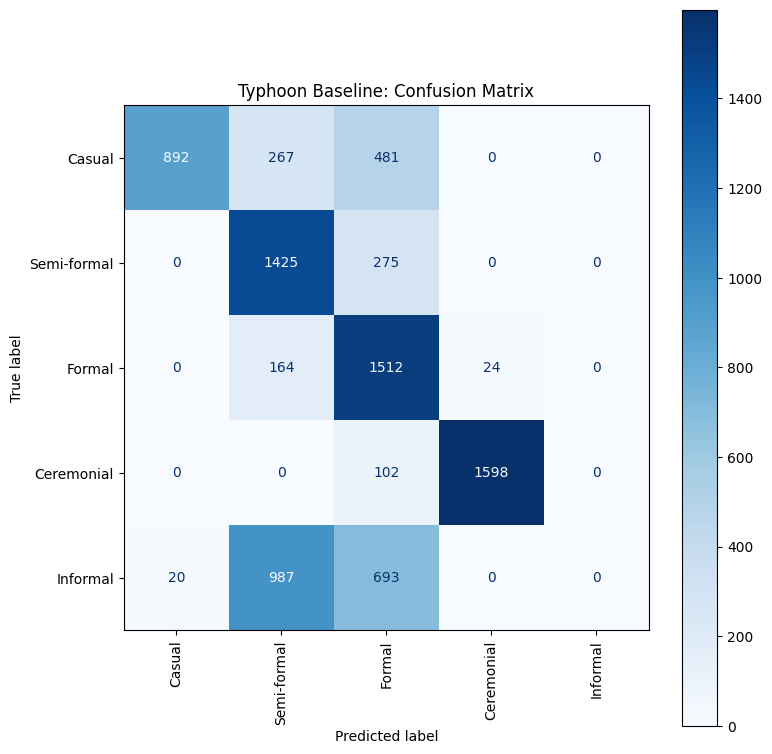


Confusion matrix and report displayed.


In [58]:
print("\n--- Classification Report ---")
print(classification_report(y_true, y_pred, labels=label_list, digits=3))

cm = confusion_matrix(y_true, y_pred, labels=label_list)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_list)

fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation="vertical")
ax.set_title("Typhoon Baseline: Confusion Matrix")
plt.tight_layout()
plt.show()

print("\nConfusion matrix and report displayed.")